In [1]:
import numpy as np
import matplotlib.pyplot as plt

## **Lineaarinen regressio (Linear regression)**

Tavoitteena on löytää laskukaava

$$
y=w_1x_1+w_2x_2+\dots+w_nx_n+b
$$

suureen $y$ arvoille muuttujien $x_1,x_2,\dots,x_n$ avulla.

Kertoimet $w_1,w_2,\dots,w_n$ (weights) ja $b$ (bias) määrätään datan perusteella minimoimalla kustannusfunktio.







## **Yksi muuttuja**









Data: pisteet
$
x^{(i)}, y^{(i)}
,\quad
i=1,2,...,m
$




Etsitään kertoimet $w$ ja $b$ niin, että suora
$
y=wx+b
$
kulkee mahdollisimman hyvin datapisteiden kautta, eli $
y^{(i)}\approx wx^{(i)}+b
$


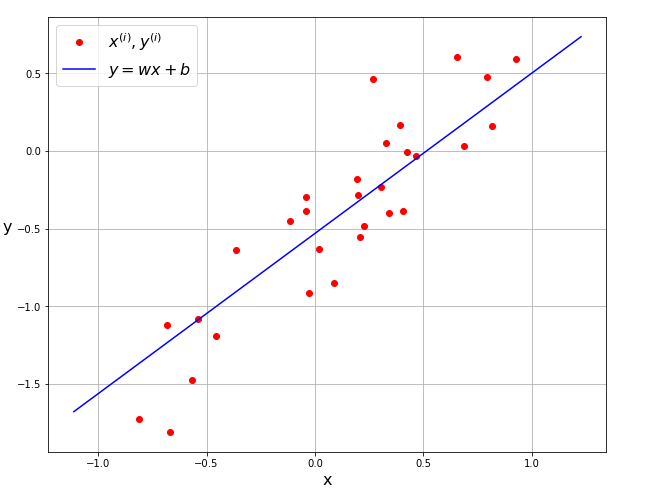

Kertoimet $w$ ja $b$ löydetään minimoimalla kustannusfunktio (MSE, Mean Square Error)

$$
C=C(w,b)=\frac{1}{m}\sum_{i=1}^m (wx^{(i)}+b-y^{(i)})^2
$$

eli datapisteiden ja suoran välisten pystysuorien etäisyyksien neliöiden keskiarvo

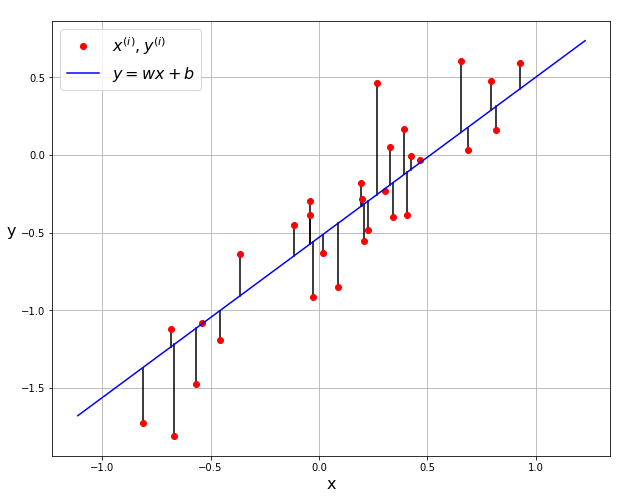

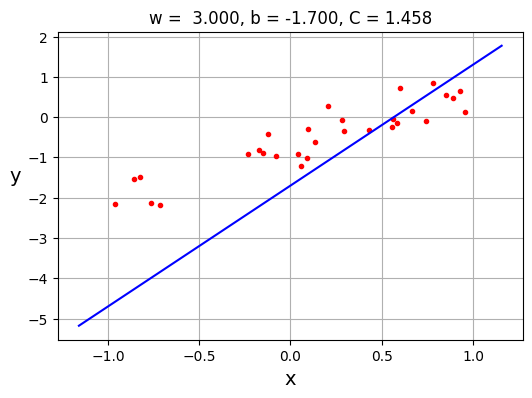

In [ ]:
#luodaan datapisteet
m=30
np.random.seed(0)
#x = m satunnaislukua väliltä a ... b
a=-1
b=1
x=a+(b-a)*np.random.rand(m) #rand = tasaisesti jakautuineita satunnaislukuja 0...1

#y=kx+p+virhe
k=1.4
p=-0.7
virhe=0.3*np.random.randn(m) #randn = normaalijakautuneita satunnaislukuja, ka = 0, kh = 1
y=k*x+p+virhe

#suoran y=wx+b kertoimet
w=3
b=-1.7
#kustannusfunktio C
C=1/m*np.sum((w*x+b-y)**2)

#suoran päätepisteet
r=0.2
xmin=np.min(x)-r
xmax=np.max(x)+r
xx=np.array([xmin,xmax])
yy=w*xx+b

plt.figure(figsize=(6,4))
plt.plot(x,y,'r.')#datapisteet
plt.plot(xx,yy,'b') #suora y=wx+b
plt.xlabel('x',fontsize=14)
plt.ylabel('y  ',fontsize=14,rotation=0)
plt.grid()
plt.title('w =  {:.3f}'.format(w)+', b = {:.3f}'.format(b)+', C = {:.3f}'.format(C))
plt.show()

 **Kustannusfunktion minimointi nopeimman laskeutumisen periaatteella (gradient descent)**


Kustannusfunktion  
$$C=C(w,b)=\frac{1}{m}\,
\sum_{i=1}^m \,(wx^{(i)}+b-y^{(i)})^2$$



osittaisderivaatat (eli derivaatat  $w$:n ja $b$:n suhteen) pisteessä $[w,b] $ ovat

$$
\begin{array}{l}
\displaystyle{\frac{\partial C}{\partial w}=\frac{1}{m}\,\sum_{i=1}^m \,2(wx^{(i)}+b-y^{(i)}) x^{(i)}}
\\\\
\displaystyle{\frac{\partial C}{\partial b}=\frac{1}{m}\,\sum_{i=1}^m \,2(wx^{(i)}+b-y^{(i)})}
\end{array}
$$


Eli, kun  $w$:n ja $b$:n muutokset $\Delta w$ ja $\Delta b$ ovat pieniä, niin

$$
C(w+\Delta w,b)\approx C(w,b)+\underbrace{\frac{\partial C}{\partial w}\cdot \Delta w}_{C\textrm{:n muutos}}
$$



$$
C(w,b+\Delta b)\approx C(w,b)+\underbrace{\frac{\partial C}{\partial b}\cdot \Delta b}_{C\textrm{:n muutos}}
$$


$$
\hspace{-2cm}C(w+\Delta w,b+\Delta b)\approx C(w,b)+\underbrace{\frac{\partial C}{\partial w}\cdot \Delta w+\frac{\partial C}{\partial b}\cdot \Delta b}_{C\textrm{:n muutos}}
$$


Kustannusfunktion $C$ **gradientti** on vektori

$$
\nabla C=\left[\frac{\partial C}{\partial w},\frac{\partial C}{\partial b}\right]
$$


$$
\begin{array}{l}\\\end{array}
$$

Gradientti on kohtisuorassa kustannusfunktion tasa-arvokäyrää $C=C(w,b)$  vastaan ja

 $C$:n  arvot kasvavat nopeimmin $\nabla C$:n suuntaan ja pienenevät nopeimmin vastakkaiseen eli $-\nabla C$:n suuntaan.




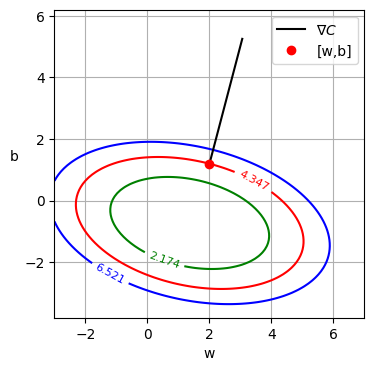

In [ ]:
#kustannusfunktion osittaisderivaatat pisteessä [w,b]
w=2.0
b=1.2
Cwb=1/m*np.sum((w*x+b-y)**2) #C(w,b)
dCw=1/m*np.sum(2*(w*x+b-y)*x) #derivaatta w:n suhteen
dCb=1/m*np.sum(2*(w*x+b-y)) #derivaatta b:n suhteen

#grid-pisteet C:n tasa-arvokäyriä varten
ww=np.linspace(w-5,w+5,100)
bb=np.linspace(b-5,b+5,100)
ww,bb=np.meshgrid(ww,bb) #ww,bb-parit
mw,nw=ww.shape
CC=np.zeros((mw,nw)) #C:n arvot grid-pisteissä
for r in range(mw):
    for s in range(nw):
        CC[r,s]=1/m*np.sum((ww[r,s]*x+bb[r,s]-y)**2)

plt.figure(figsize=(4,4))
#tasa-arvokäyrät C=0.5*Cwb,C=Cwb,C=1.5*Cwb
arvot=np.array([0.5*Cwb,Cwb,1.5*Cwb])
contours=plt.contour(ww,bb,CC,arvot,colors=['g','r','b'])
plt.clabel(contours,fontsize=8)
plt.plot([w,w+dCw],[b,b+dCb],'k',label=r'$\nabla C$') #gradientti
plt.plot(w,b,'ro',label='[w,b]')
plt.xlabel('w')
plt.ylabel('b  ',rotation=0)
plt.grid()
plt.legend()
plt.show()

**Gradient descent**:
valitaan kertoimille $w$ ja $b$ alkuarvot  ja päivitetään niitä seuraavasti:

$$
w=w-\alpha\cdot \frac{\partial C}{\partial w},\quad b=b-\alpha\cdot \frac{\partial C}{\partial b}
$$




kunnes $C$:n arvot eivät enää juurikaan pienene.

Eli, kertoimia $w$ ja $b$ päivitetään niin, että $wb$-koordinaatistossa liikutaan $-\nabla C$:n eli jyrkimmän alamäen suuntaan, kohtisuoraan korkeuskäyriä $C = $ vakio vastaan

$$
[w,b]\to [w,b]-\alpha \cdot \nabla C
$$

$$
\begin{array}{l}\\\end{array}
$$

Kerroin $\alpha>0$ on ns. **oppimisnopeus (learning rate)**, joka määrää päivitysaskeleen $-\alpha\cdot \nabla C$ pituuden

$$\alpha \cdot |\nabla C|=\alpha\cdot \sqrt{\left(\frac{\partial C}{\partial w}\right)^2+\left(\frac{\partial C}{\partial b}\right)^2}$$

In [ ]:
#gradient descent
#learning rate
alfa=0.05
#kierrosten määrä
N=500
#kertoimien alkuarvot
w=np.random.randn()
b=np.random.randn()
w=-2
b=2

#kerätään kertoimien w ja b
#ja kustannuksen C arvot talteen
#vektoreihin W,B ja Cost
W=np.zeros(N+1)
B=np.zeros(N+1)
Cost=np.zeros(N+1)
W[0]=w
B[0]=b
Cost[0]=1/m*np.sum((w*x+b-y)**2)

for n in range(N): #n=0,1,2,...,N-1
    #osittaisderivaatat
    dCw=1/m*np.sum(2*(w*x+b-y)*x)
    dCb=1/m*np.sum(2*(w*x+b-y))
    #kertoimien päivitys
    w=w-alfa*dCw
    b=b-alfa*dCb
    #kerätään talteen
    W[n+1]=w
    B[n+1]=b
    Cost[n+1]=1/m*np.sum((w*x+b-y)**2)

In [ ]:
#viimeiset kertoimet
print(w)
print(b)
print(Cost[N])

1.3629236962396192
-0.7236638701634627
0.11087392792968122


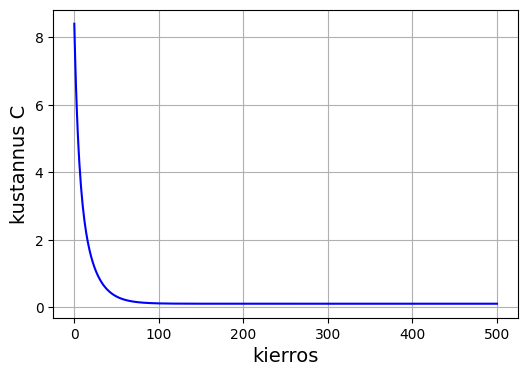

In [ ]:
#kustannusfunktion kuvaaja
plt.figure(figsize=(6,4))
plt.plot(Cost,'b')
plt.xlabel('kierros',fontsize=14)
plt.ylabel('kustannus C',fontsize=14)
plt.grid()
plt.show()

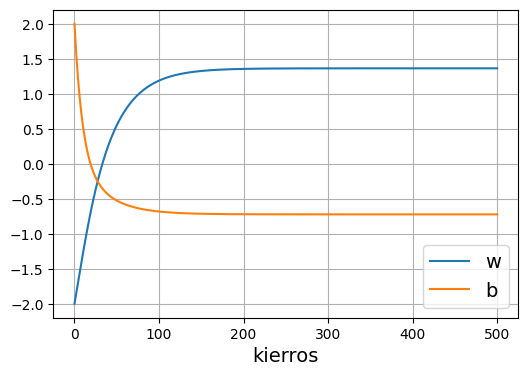

In [ ]:
#kertoimien kuvaajat
plt.figure(figsize=(6,4))
plt.plot(W,label='w')
plt.plot(B,label='b')
plt.xlabel('kierros')
plt.legend(fontsize=14)
plt.grid()
plt.xlabel('kierros',fontsize=14)
plt.show()

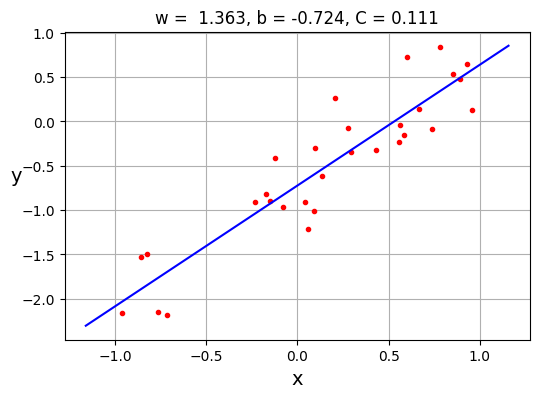

In [ ]:
#suora y = wx+b
#päätepisteet
r=0.2
xmin=np.min(x)-r
xmax=np.max(x)+r
xx=np.array([xmin,xmax])
yy=w*xx+b
plt.figure(figsize=(6,4))
plt.plot(x,y,'r.')
plt.plot(xx,yy,'b')
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14,rotation=0)
plt.grid()
plt.title('w =  {:.3f}'.format(w)+', b = {:.3f}'.format(b)+', C = {:.3f}'.format(Cost[N]))
plt.show()

Huom: Kustannusfunktion minimi löydetään tässä tapauksessa  myös osittaisderivaattojen nollakohtien avulla, eli ratkaisemalla yhtälöpari

 $$
\left\{
\begin{array}{l}
\displaystyle{\frac{\partial C}{\partial w}=\frac{2}{m} \sum_{i=1}^m (wx^{(i)}+b-y^{(i)})x^{(i)}=0}\\\\
\displaystyle{\frac{\partial C}{\partial b}=\frac{2}{m}  \sum_{i=1}^m (w x^{(i)}+b-y^{(i)}})=0
\end{array}
\right.
$$

$$
\begin{array}{l}\\\end{array}
$$



(Pienimmän NeliöSumman, PNS, Least squares) ratkaisu on

$$
\begin{array}{l}\\\end{array}
$$


$$\left[\begin{array}{c}
w\\b
\end{array}\right]
=(X^T@X)^{-1}@ X^T@ Y
$$



missä

$$
X=\left[\begin{array}{cc}
x^{(1)}&1\\
x^{(2)}&1\\
\vdots&\vdots\\
x^{(m)}&1
\end{array}\right], \quad Y= \left[\begin{array}{c}
y^{(1)}\\y^{(2)}\\\vdots\\y^{(m)}\end{array}\right]
$$

$$
\begin{array}{l}\\\end{array}
$$

$X^T$ on $X$:n transpoosi, $@$ on matriisikertolasku ja $(X^T@X)^{-1}$ on  $X^T@X$:n käänteismatriisi.



In [ ]:
#tarkka minimi
X=np.zeros((m,2))
X[:,0]=x
X[:,1]=np.ones(m)
Y=y.reshape(m,1)
wb=np.linalg.inv(X.T@X)@X.T@Y
w0=wb[0,0]
b0=wb[1,0]
C0=1/m*np.sum((w0*x+b0-y)**2)
print('tarkka w = '+str(w0))
print('löydetty w = '+str(w))
print('tarkka b = '+str(b0))
print('löydetty b = '+str(b))
print('tarkka Cost minimi = '+str(C0))
print('löydetty Cost minimi = '+str(Cost[N]))

tarkka w = 1.3629245036814917
löydetty w = 1.3629236962396192
tarkka b = -0.7236640579959033
löydetty b = -0.7236638701634627
tarkka Cost minimi = 0.1108739279294733
löydetty Cost minimi = 0.11087392792968122


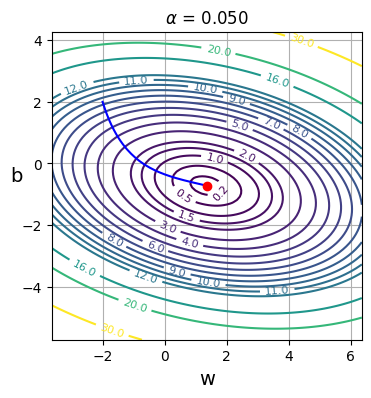

In [ ]:
#kustannusfunktion korkeuskäyrä-kuvaaja
ww=np.linspace(w0-5,w0+5,100)
bb=np.linspace(b0-5,b0+5,100)
ww,bb=np.meshgrid(ww,bb)
mw,nw=ww.shape
CC=np.zeros((mw,nw))
for r in range(mw):
    for s in range(nw):
        CC[r,s]=1/m*np.sum((ww[r,s]*x+bb[r,s]-y)**2)

plt.figure(figsize=(4,4))
#contours=plt.contour(ww,bb,CC,30) #30 korkeuskäyrää
arvot=np.array([0.2,0.5,1,1.5,2,3,4,5,6,7,8,9,10,11,12,16,20,30])
contours=plt.contour(ww,bb,CC,arvot) #arvoja vastaavat korkeuskäyrät
plt.clabel(contours,fontsize=8)
plt.plot(W,B,'b') #kertoimien "rata"
plt.plot(w0,b0,'ro')
plt.xlim((w0-5,w0+5))
plt.ylim((b0-5,b0+5))
plt.xlabel('w',fontsize=14)
plt.ylabel('b',fontsize=14,rotation=0)
plt.title(r'$\alpha$ = {:.3f}'.format(alfa))
plt.grid()

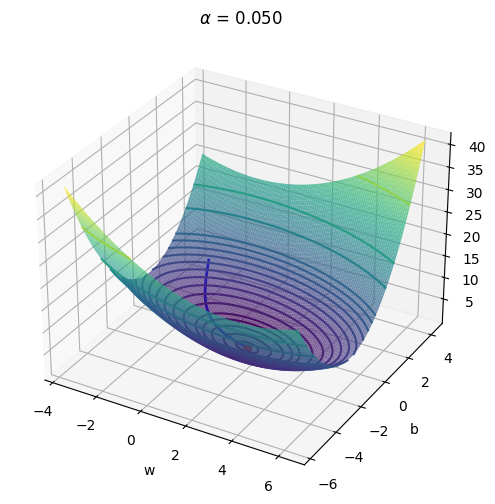

In [ ]:
#3D pinta-kuvaaja

from mpl_toolkits import mplot3d

plt.figure(figsize=(6,6))
ax=plt.axes(projection='3d')
ax.contour3D(ww,bb,CC,arvot)
ax.plot_surface(ww,bb,CC,rstride=1, cstride=1,cmap='viridis', edgecolor='none',alpha=0.7)
ax.plot3D(W,B,Cost,'b',linewidth=2)
ax.plot3D([w0],[b0],[C0],'ro')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('C')
ax.set_title(r'$\alpha$ = {:.3f}'.format(alfa))
plt.show()

Huom: jos oppimisnopeus $\alpha$ on  pieni, niin minimiä lähestytään hitaasti pienin askelin, ja jos se on suuri, niin  hyppien pidempiä askeleita
Jos $\alpha$ on liian suuri, niin kustannusfunktion arvot saattavat ruveta kasvamaan


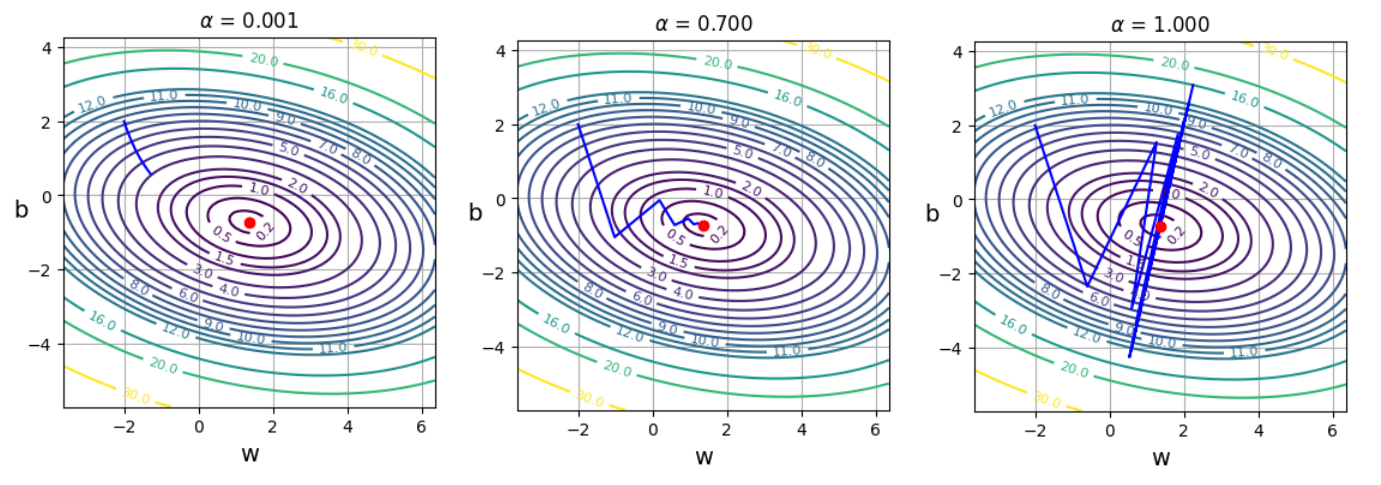


[scikit learn-kirjastolla](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [ ]:
from sklearn.linear_model import LinearRegression

X=x.reshape(m,1) #pystyvektori, (m,1)
#y on 1D-vektori, (m,)
model=LinearRegression().fit(X,y)

w=model.coef_
print(w)

b=model.intercept_
print(b)


[1.3629245]
-0.7236640579959033


## $n$  **muuttujaa**





Datapisteet
$x^{(i)}=[x^{(i)}_1,x^{(i)}_2,\dots,x^{(i)}_n],\,y^{(i)},\quad i=1,2,\dots,m$

$$
\begin{array}{l}\\
\end{array}
$$





Etsitään niiden perusteella suureelle $y$ laskukaava

$$y= w_1x_1+w_2x_2+\dots + w_nx_n+b$$





 eli   kertoimet $w_1,w_2,\dots,w_n$ ja $b$ niin, että

$$
y^{(i)}\approx  w_1x_1^{(i)}+w_2x_2^{(i)}+\dots + w_nx_n^{(i)}+b
$$

 eli
taso

$$
y=w_1x_1+w_2x_2+\dots + w_nx_n+b
$$

kulkee mahdollisimman hyvin datapisteiden kautta




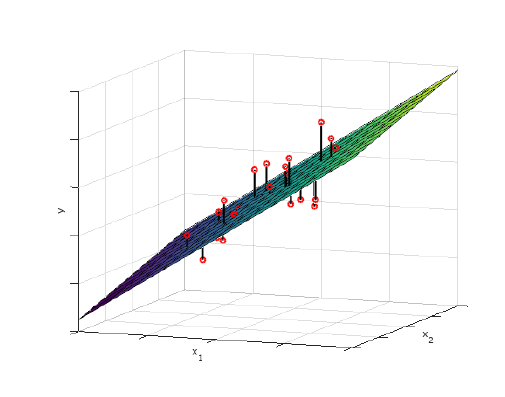

Kustannusfunktio (MSE, Mean Square Error)

$$
C=\frac{1}{m}\,\sum_{i=1}^m \left(w_1x^{(i)}_1+\dots +w_nx^{(i)}_n+b-y^{(i)}\right)^2
$$

 eli datapisteiden ja tason välisten pystysuorien etäisyyksien neliöiden keskiarvo.


 Kustannusfunktion $C$ minimointi gradient descentillä: valitaan  kertoimille
$w_1,w_2,\dots,w_n$ ja $b$ alkuarvot ja päivitetään niitä seuraavasti

$$\begin{array}{l}
\displaystyle{w_j=w_j-\alpha\cdot \frac{\partial C}{\partial w_j}},\quad j=1,2,\dots,n\\\\
\displaystyle{b=b-\alpha\cdot \frac{\partial C}{\partial b}}
\end{array}
$$

kunnes $C$:n arvot eivät enää pienene.

Tässä $\alpha>0$ on oppimisnopeus (learning rate)
ja osittaisderivaatat

$$\begin{array}{l}
\displaystyle{\frac{\partial C}{\partial w_j}=\frac{1}{m}\,\sum_{i=1}^m \,2\left(w_1x^{(i)}_1+\dots +w_nx^{(i)}_n+b-y^{(i)}\right) x^{(i)}_j}\\\\
\displaystyle{\frac{\partial C}{\partial b}=\frac{1}{m}\,\sum_{i=1}^m \,2\left(w_1x^{(i)}_1+\dots +w_nx^{(i)}_n+b-y^{(i)}\right)}
\end{array}
$$

Tarkka minimikohta (osittaisderivaatat ovat =  0, PNS-ratkaisu):





$$\left[\begin{array}{c}
w_1\\w_2\\\vdots\\w_n\\b
\end{array}\right]
=(X^T@X)^{-1}@X^T@Y
$$



missä

$$\hspace{-1cm}
X=\left[\begin{array}{ccccc}
x^{(1)}_1&x^{(1)}_2&\dots&x^{(1)}_n&1\\
x^{(2)}_1&x^{(2)}_2&\dots&x^{(2)}_n&1\\
\vdots&\vdots&&\vdots&\vdots\\
x^{(m)}_1&x^{(m)}_2&\dots&x^{(m)}_n&1
\end{array}\right],\quad
Y=\left[\begin{array}{c}
y^{(1)}\\y^{(2)}\\\,\vdots\,\\y^{(m)}\end{array}\right]
$$


### Esim: [Diabetes-data](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset), 442 datapistettä, 10 muuttujaa



In [2]:
from sklearn import datasets
X,y=datasets.load_diabetes(return_X_y=True, scaled=False)
#datapisteiden koordinaatit matriisin X vaakariveinä
#y:n arvot 1D-vektorissa y

In [3]:
np.set_printoptions(linewidth=100)
print(X.shape)
print(y.shape)
print(X[0:5,:]) #5 ensimmäistä datapistettä
print(y[0:5]) #ja vastaavat y:n arvot

(442, 10)
(442,)
[[ 59.       2.      32.1    101.     157.      93.2     38.       4.       4.8598  87.    ]
 [ 48.       1.      21.6     87.     183.     103.2     70.       3.       3.8918  69.    ]
 [ 72.       2.      30.5     93.     156.      93.6     41.       4.       4.6728  85.    ]
 [ 24.       1.      25.3     84.     198.     131.4     40.       5.       4.8903  89.    ]
 [ 50.       1.      23.     101.     192.     125.4     52.       4.       4.2905  80.    ]]
[151.  75. 141. 206. 135.]


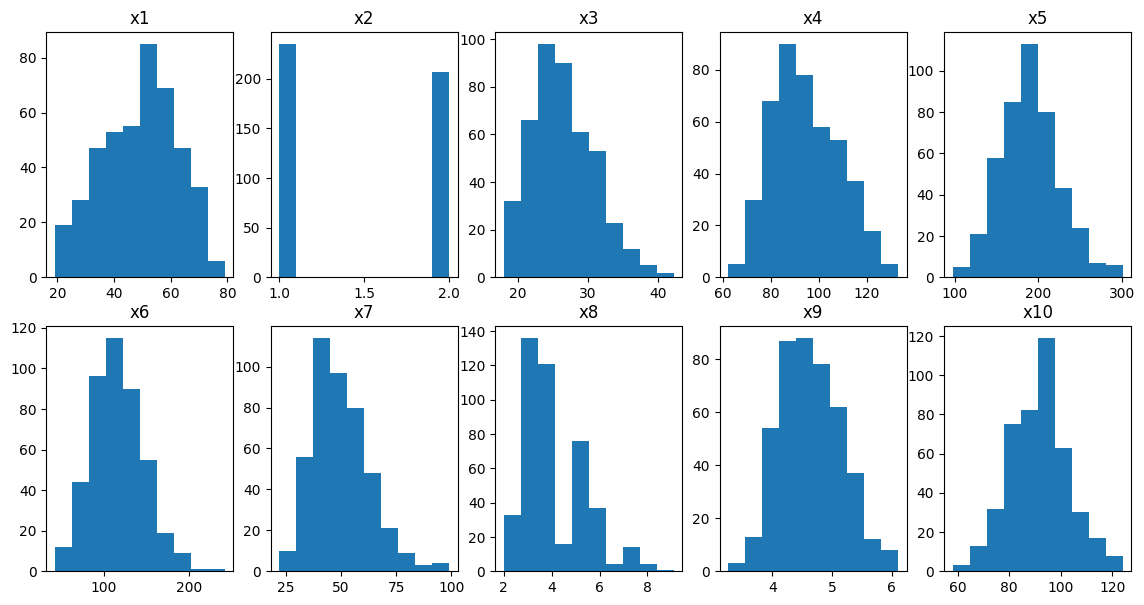

In [4]:
#koordinaattien arvojen jakaumat
plt.figure(figsize=(14,7))
for k in range(10):
  plt.subplot(2,5,k+1)
  plt.hist(X[:,k])
  plt.title('x'+str(k+1))

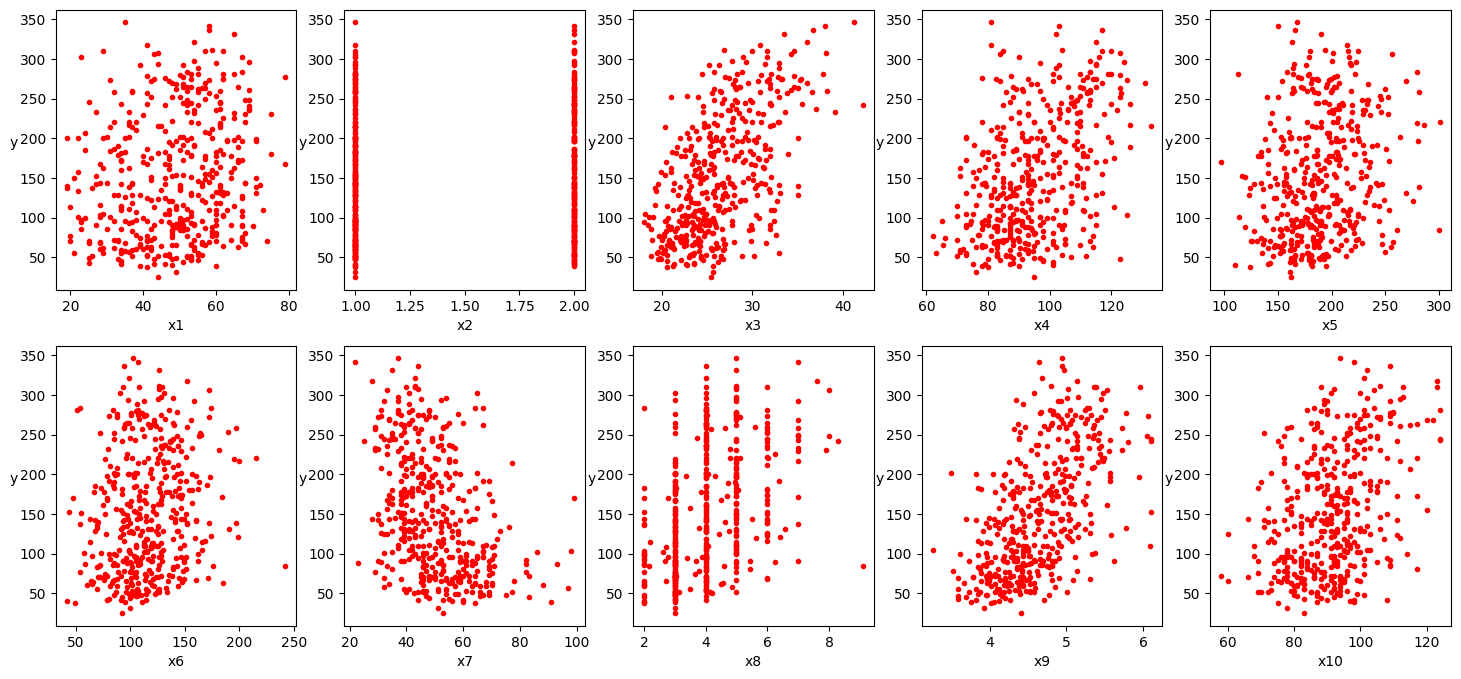

In [5]:
#suureen y riippuvuus muuttujista x1-x10
plt.figure(figsize=(18,8))
for k in range(10):
  plt.subplot(2,5,k+1)
  plt.plot(X[:,k],y,'r.')
  plt.xlabel('x'+str(k+1))
  plt.ylabel('y',rotation=0)


In [6]:
from sklearn.linear_model import LinearRegression

model=LinearRegression().fit(X,y)
w=model.coef_
b=model.intercept_

np.set_printoptions(precision=3,linewidth=300)
print(w)
print(b)


[-3.636e-02 -2.286e+01  5.603e+00  1.117e+00 -1.090e+00  7.465e-01  3.720e-01  6.534e+00  6.848e+01  2.801e-01]
-334.5671385187868


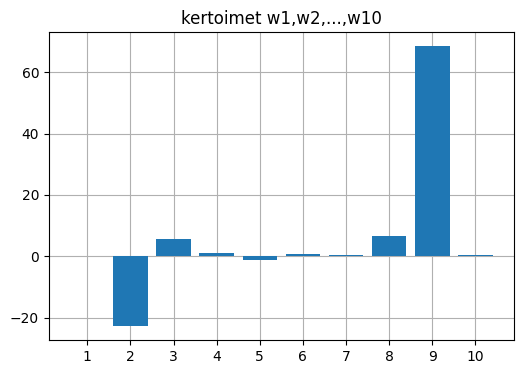

In [7]:
plt.figure(figsize=(6,4))
plt.bar(np.arange(1,11),w,zorder=2)
plt.grid()
plt.xticks(np.arange(1,11))
plt.title('kertoimet w1,w2,...,w10')
plt.show()

In [8]:
#laskukaavan ennustamat y:n arvot datapisteille
ypred=np.sum(w*X,axis=1)+b

#kustannusfunktion minimiarvo (mse = mean squared error)
m=442
C=1/m*np.sum((ypred-y)**2)
print(C)
#erotusten itseisarvojen keskiarvo (mae=mean average error)
mae=1/m*np.sum(np.abs(ypred-y))
print(mae)

2859.696347586751
43.277452025315064


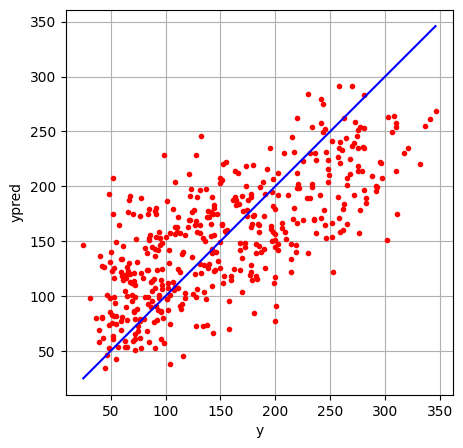

In [9]:
#datapisteiden y ja kaavan ennustama y
ymin=np.min(y)
ymax=np.max(y)
plt.figure(figsize=(5,5))
plt.plot(y,ypred,'r.')
plt.plot([ymin,ymax],[ymin,ymax],'b')
plt.grid()
plt.axis('equal')
plt.xlabel('y')
plt.ylabel('ypred')
plt.show()


In [10]:
#testipiste
xt=np.array([62,2,36.3,97.2,143.1,96.4,35.7,3.8,4.6,85.6])
#laskukaavan ennustama y
yt=np.sum(w*xt)+b
print(yt)

222.48929760222416


**Skaalaus:** Jos

$$
\displaystyle{\mu_j=\frac{1}{m}\sum_{i=1}^m x^{(i)}_j\quad \textrm{ ja }\quad \sigma_j=\sqrt{\frac{1}{m}\sum_{i=1}^m (x^{(i)}_j-\mu_j)^2}},\quad j=1,2,...,n
$$

ovat datapisteiden koordinaattien keskiarvot ja -hajonnat, niin skaalattujen datapisteiden

$$
\displaystyle{\widehat{x}^{(i)}=\left[\frac{x^{(i)}_1-\mu_1}{\sigma_1},\frac{x^{(i)}_2-\mu_2}{\sigma_2},\dots,\frac{x^{(i)}_n-\mu_n}{\sigma_n}\right]}
$$

 koordinaattien keskiarvot ovat $=0$ ja -hajonnat $=1$


Skaalattujen datapisteiden $\widehat{x}^{(i)},y^{(i)}$
 perusteella löydetään kertoimet $w_1,\dots,w_n$ ja $b$
laskukaavaan

$$
y=w_1\widehat{x}_1+w_2\widehat{x}_2+\dots+w_n\widehat{x}_n+b
$$

missä


$$
\widehat{x}=\displaystyle{\left[\frac{x_1-\mu_1}{\sigma_1},\frac{x_2-\mu_2}{\sigma_2},\dots,\frac{x_n-\mu_n}{\sigma_n}\right]
}$$

on pisteen
$
x=[x_1,x_2,\dots,x_n]
$
skaalattu versio

In [11]:
mu=np.mean(X,axis=0) #koordinaattien keskiarvot
print(mu)
s=np.std(X,axis=0) #ja keskihajonnat
print(s)
Xhat=(X-mu)/s #skaalatut datapisteet

[ 48.518   1.468  26.376  94.647 189.14  115.439  49.788   4.07    4.641  91.26 ]
[13.094  0.499  4.413 13.816 34.569 30.379 12.92   1.289  0.522 11.483]


In [12]:
#kertoimet käyttäen skaalattuja koordinaatteja
model_hat=LinearRegression().fit(Xhat,y)

what=model_hat.coef_
print(what)
bhat=model_hat.intercept_
print(bhat)

[ -0.476 -11.407  24.727  15.429 -37.68   22.676   4.806   8.422  35.734   3.217]
152.13348416289597


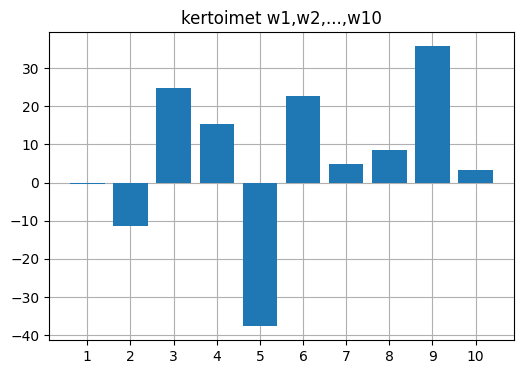

In [13]:
plt.figure(figsize=(6,4))
plt.bar(np.arange(1,11),what,zorder=2)
plt.grid()
plt.xticks(np.arange(1,11))
plt.title('kertoimet w1,w2,...,w10')
plt.show()

In [14]:
#testipiste
xt=np.array([62,2,36.3,97.2,143.1,96.4,35.7,3.8,4.6,85.6])
#skaalaus
xt_hat=(xt-mu)/s
#laskukaavan ennustama y
yt=np.sum(what*xt_hat)+bhat
print(yt)

222.48929760222455
